In [1]:
msmarco_path = "/home/jxm3/research/retrieval/data/msmarco/corpus.jsonl"

lines = []
with open(msmarco_path) as f:
    while len(lines) < 10**6:
        lines.append(f.readline())

In [2]:
import json
texts = [json.loads(l)["text"] for l in lines]

In [3]:
import transformers

tokenizer = transformers.AutoTokenizer.from_pretrained("t5-base")

/home/jxm3/.conda/envs/torch/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [4]:
import pandas as pd
from tqdm import tqdm

num_tokens = pd.Series(map(lambda t: len(tokenizer.encode(t)), tqdm(texts)))

100%|███████████████████████████████████████████████████████████████████████████████████████| 1000000/1000000 [04:25<00:00, 3760.67it/s]


Text(0.5, 1.0, 'number of tokens per example in msmarco corpus')

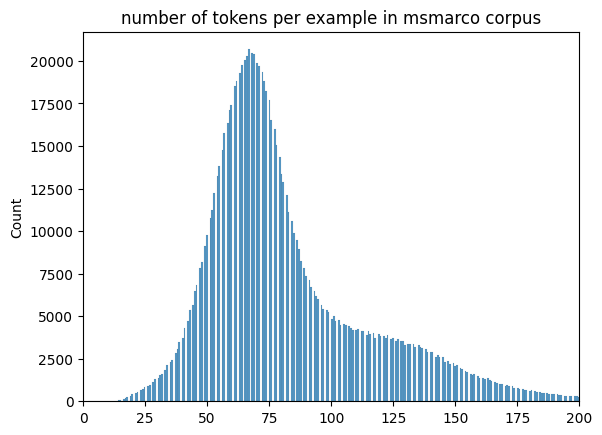

In [10]:
import seaborn as sns

ax = sns.histplot(num_tokens)
ax.set_xlim([0, 200])
ax.set_title('number of tokens per example in msmarco corpus')

In [11]:
num_tokens.mean()

82.719646

In [12]:
num_tokens.mean() / 55.98 

1.4776642729546268

In [13]:
num_tokens.mean() / 55.98  * 634.79 # trec-news is this many tokens 

938.0065038288675